In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('September_MTBF.csv')

In [3]:
data_cleared = data[['Machine name','MTBF']]
data_cleared = data_cleared[data_cleared['MTBF'] != "0:00:00"]
data_cleared = data_cleared.head() # Return the top 5 values
data_cleared

,Machine name,MTBF
35,Placeholder 36,4:35:30
36,Placeholder 37,10:46:58
37,Placeholder 38,15:26:29
38,Placeholder 39,17:47:10
39,Placeholder 40,23:22:17


In [4]:
def to_sec():
    time = [string.split(':') for string in list((data_cleared['MTBF']))]
    second = []

    for i in range(len(time)):
        second.append(int(time[i][0]) * 3600 + int(time[i][1]) * 60 + int(time[i][2]))
    return second

print(to_sec())

[16530, 38818, 55589, 64030, 84137]


In [5]:
machines = list(data_cleared['Machine name'])
mtbf = list(data_cleared['MTBF'])
values = to_sec()

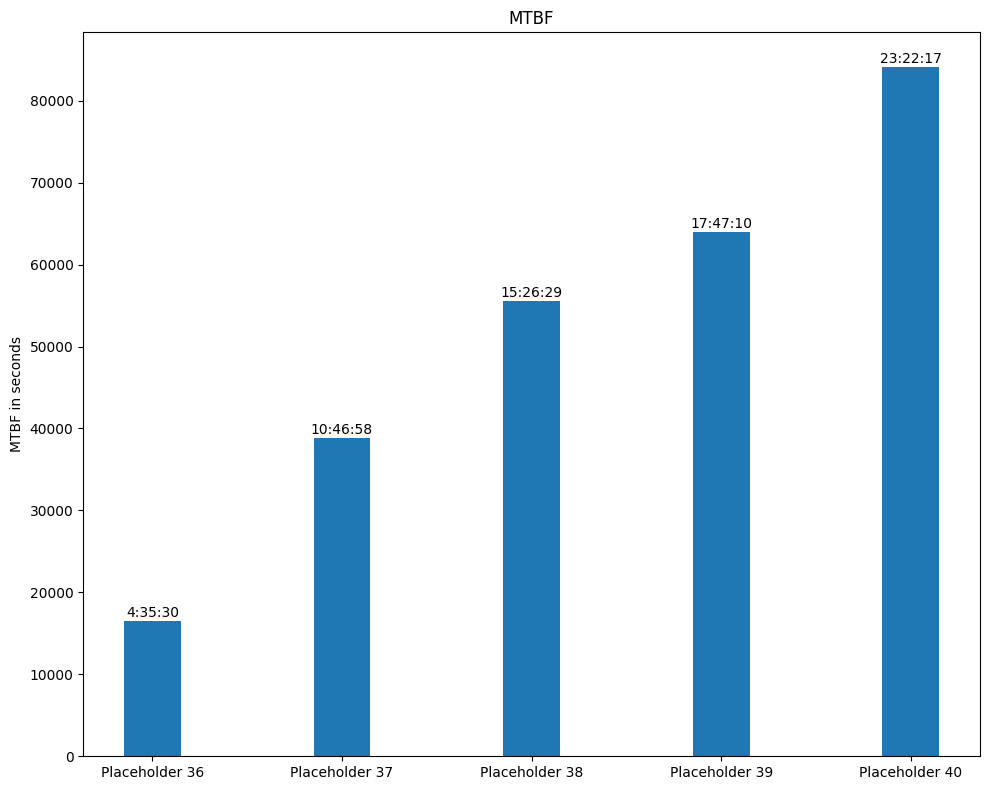

In [6]:
# Increase the figure size
plt.figure(figsize=(10, 8))

# Create the vertical bar plot
plt.bar(machines, values, width = 0.3)
#plt.xlabel('Machine name', fontweight = 'bold')
plt.ylabel('MTBF in seconds')
plt.title('MTBF')

# Rotate X-axis labels for readability
plt.xticks()

# Display the MTTR values on top of the bars
for i in range(len(values)):
    plt.text(i, values[i] + 100, mtbf[i], ha='center', va='bottom')

#plt.gca().invert_yaxis()  # Invert the Y-axis to display the first machine at the top
plt.tight_layout()
plt.show()